# Project 4: Ordinary Differential Equations
## 4.1 (Euler's Method)

Today we'll do use the tools we've built up to solve a physics problem: use python to compute the motion of a projectile in the presence of drag!

## Learning Objectives
* Practice with algorithms and functions
* Learn how to discretize a differential equation
* Do a few simple problems using the Euler method
* Learn about numerical discretization error
* Relate a mathematical solution to its physical interpretation

# Pre-class

This [video](https://youtu.be/p_di4Zn4wz4) covers the basics of how to numerical solve a differential equation. Please watch the first 4:15 (after that it's more advanced but still useful).

Download the PDF of [TAK](https://catalog.lib.ncsu.edu/record/NCSU4441969) and read Sec 7.1. You will probably find it helpful to read along using a paper/pencil, and/or be able to draw on your PDF.

Read through the module below, to familiarize yourself with the day's work. There is a lot of mathematical notation here, so come to class to prepared to ask questions about what you don't understand.

How did early computers at NASA solve differential equations? Read about these [Hidden Figures](https://www.insidescience.org/news/exploring-math-hidden-figures)

# In-class

For the adventurous: there is a newly-released method of combining the notebook format with a visual debugger. If you want to try it out sometime: <https://jupyterlab.readthedocs.io/en/stable/user/debugger.html>

##  Nuclear decay

As a warmup, let's calculate and plot the analytic solution of a nuclear decay problem.  

Unstable nuclei like ${}^{235}$U, can undergo radioactive decay and break apart into two smaller nuclei along with other decay products. We cannot know precisely when a particular nu- cleus will decay due to the quantum mechanical uncertainty principle, but we can know the probability that it will have decayed after some time.

Consider radioactive decay from another perspective. Rather than look at a single ${}^{235}$U nucleus, look at a very large number of nuclei. If we know the probability that a single nucleus will decay after some period of time, then given a large number of nuclei, we can determine the fraction that remain after that period of time. Because the number of nuclei that will decay after some time is proportional to the number that were there to begin with, the rate of change of the number of nuclei is proportional to the number of nuclei. That is, $dN(t)/dt$ is proportional to $N(t)$, where $N(t)$ is the number of nuclei present at time t. Thus, the evolution of $N(t)$ is given by

$\quad \frac{dN(t)}{dt} = -\frac{1}{\tau} N(t)$

where the minus sign indicates that the population decreases in time. The constant $\tau$ is the mean lifetime (not the half–life) of the unstable nucleus.

You may recall that the resulting decay is _exponential_, that is, given an initial number of nuclei $N(t=0)\equiv N_0$,

$\quad N(t) = N_0 \exp\left(-\frac{t}{\tau}\right)$

This can be obtained via separation of variables.  We rewrite the differential equation as

$\quad \frac{dN}{N} = -\frac{dt}{\tau}$

integrate to find

$\quad \ln(N) = -\frac{t}{\tau} + C$

and solve for $N(t)$ obtaining the relation above.  The _half-life_ is related to $\tau$: $t_h = \tau \ln 2$.

## Exercise

Let's plot this result. Below, make an array of times, and calculate the number of nuclei at each time point.  We'll use the initial value $N_0 = 100$ and a mean lifetime $\tau=0.7$gy.  Given these, a time range from $t=0$gy to $t=4$gy seems reasonable for a plot. What's a gy? A giga-year!


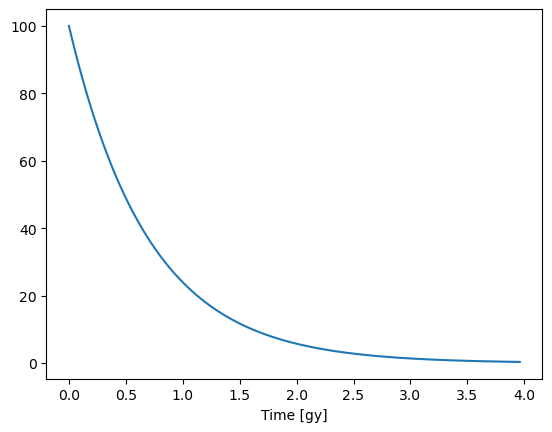

In [1]:
import numpy as np
import pylab as p

tmin = 0.0
tmax = 4.0
nts = 100

N0 = 100.0  # Note:  I'm treating this as a floating point number even though the number of nuclei should probably
            # be an integer.  We've assumed a large-ish number, so that any fraction of the initial is a whole number.
tau = 0.7


t1_array = np.zeros(nts) # Produce an array that runs from 0 to 4 (in units of gy) with 100-ish points
N1_array = np.zeros(nts)# Compute the number of nuclei. This can be done directly with array math

N1_array[0]=N0
step = (tmax-tmin)/nts
i=1
while i<100:
    t1_array[i]=0+i*step
    N1_array[i]=N0*np.exp(-t1_array[i]/tau)
    i+=1

p.plot(t1_array,N1_array,'-')
p.xlabel("Time [gy]")
p.show()


Nuclear decay with a numerical differential equation solver -- Euler's method
------------------------------
We can think about this process another way.  At any given time $t$, we know how to determine the
number of nuclei at the next time:

$\quad\frac{dN(t)}{dt} = -\frac{1}{\tau}N(t) \quad\rightarrow\quad N(t+dt) = N(t) - \frac{dt}{\tau} N(t)$

It is also useful to re-write this using an index notation -- instead of using the time $t$ as a continuous argument, we recall that we typically have an array of times (it has been _discretized_). We can index the times with $t_i$, and can also write the discretized differential equation as

$N(t_{i+1}) = N(t_i) - \frac{\Delta t}{\tau} N(t_i)$

or even shorter

$N_{i+1} = N_i - \frac{\Delta t}{\tau} N_i$


Let's try to imagine this as an algorithm:
1. We know the initial value of N(t=0) -- let's index that by it=0
2. Starting from it=0, determine N[it+1] from N[it] through the relation above
3. Stop once we reach the maximum number of time points-1

And, as pseudocode:

    t_array := a time array that contains the time values we care about. it runs from tmin to tmax and 
               has N points in it.
               
    N_array := an array of the same size as t_array where we'll store the number of nuclei
    
    N[0] = N0  # set the initial value
    for each i from 0 to N-1:
        the next value of N (N[i+1]) is determined by the current one N[i] + dt * the slope
        the slope is the RHS of the differential equation, namely -(1/tau) N

The code below implements this approach: walk through it, making sense of each line as you go.

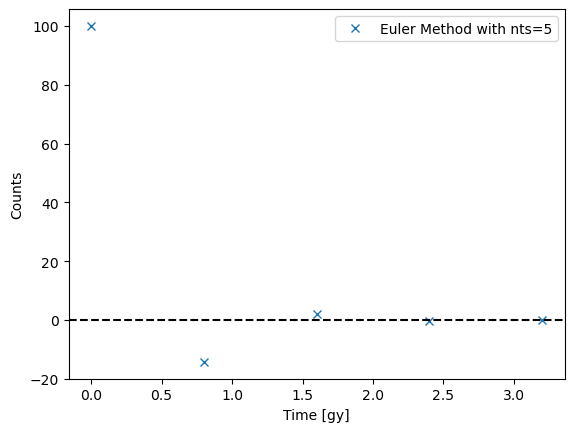

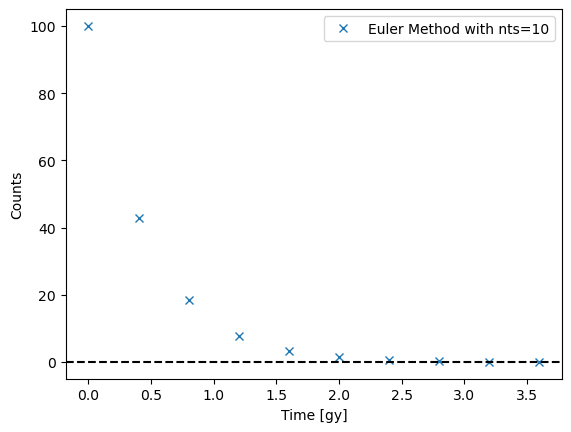

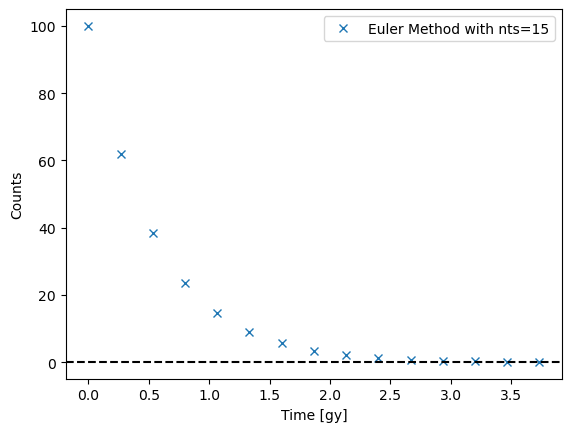

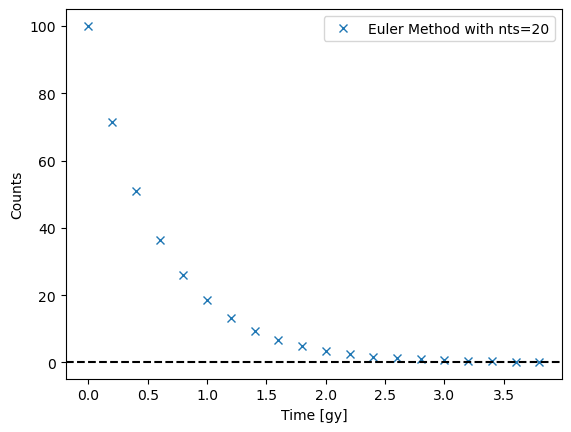

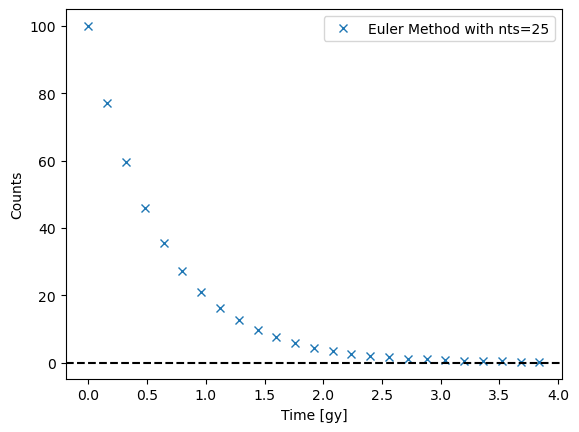

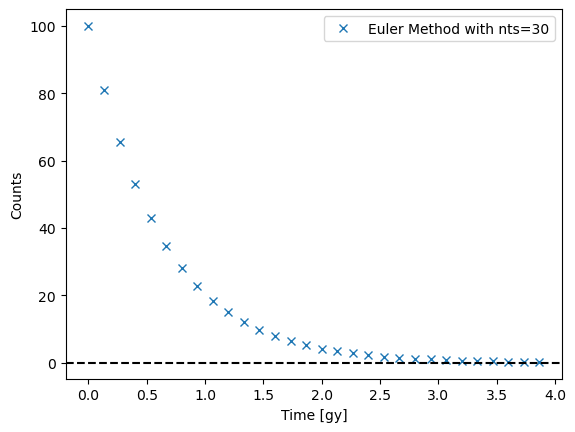

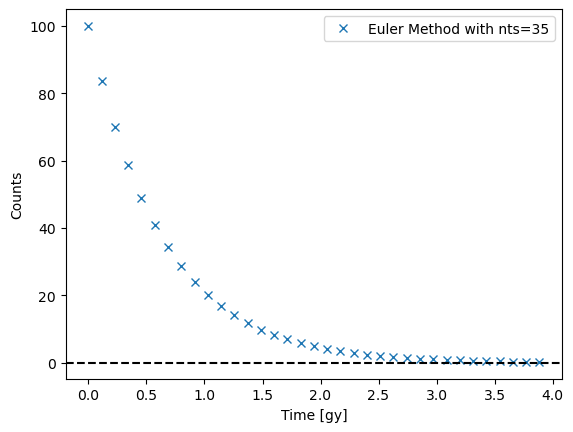

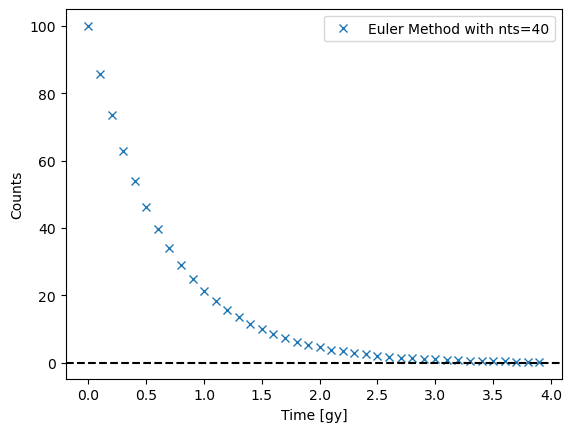

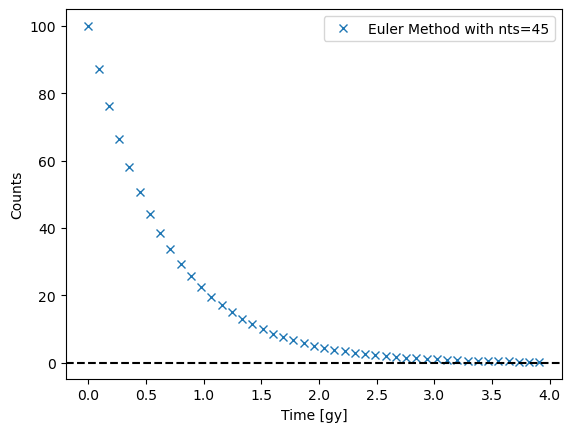

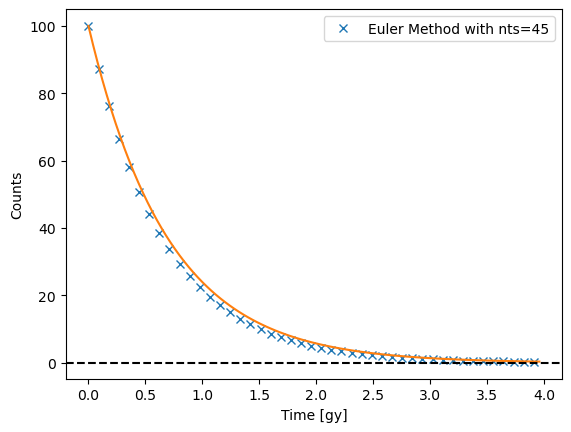

In [2]:
import numpy as np
import pylab as p

tau = 0.7        # mean lifetime
N0 = 100.0 # initial number of nuclei

tmin = 0.0
tmax = 4.0
i=1
while i < 10:
    nts=5*i
    
    # Create an array to hold the times
    t_array = np.linspace(tmin, tmax, nts, endpoint=False)  
    # NOTE ENDPOINT HERE: can you figure out what it does? 
    
    dt = t_array[1] - t_array[0]  
    # This is an easy way to define dt that is not error prone
    # Should match (tmax-tmin)/nts if you're careful about "endpoint"
            
    #print("t_array:",t_array)  # See what it looks like
    
    # Empty array to hold the number of nuclei
    N_array          = np.zeros( nts )
    
    # THIS IS THE ACTUAL ALGORITHM PART
    
    # Set the initial condition
    N_array[0] = N0
    
    #fill the rest of the solution, step by step
    for it in range(0, len(t_array)-1 ): # Note the -1: what happens if we don't have it?
        
        N_array[it+1] = N_array[it] + (-dt/tau) * N_array[it]
        
        # Some output so we can watch!
        #print('at time t = {:.3f}, N = {:.3f}'.format(t_array[it+1],N_array[it+1]))
    
    p.plot(t_array, N_array, 'x', label="Euler Method with nts="+str(nts))
    
    p.legend()
    p.axhline(0.0, color='k', linestyle='--')
    p.xlabel("Time [gy]")
    p.ylabel("Counts")
    p.show()
    i+=1

p.plot(t_array, N_array, 'x', label="Euler Method with nts="+str(nts))
p.plot(t1_array,N1_array,'-')
p.legend()
p.axhline(0.0, color='k', linestyle='--')
p.xlabel("Time [gy]")
p.ylabel("Counts")
p.show()

Exercise
----------------
* Make sure you understand how the above code works. 
* Run this code using various values of `nts`, and compare your answers to the exact answer (you can print this from the cell above).

Note that your answers improve as the resolution is increased. (We say that the resolution increases as the number of timesteps `nts` increases for a given time interval `tmax - tmin`. Equivalently, the resolution increases as the timestep `dt` decreases.)

* Add to the above code: **Plot the analytic solution on the same plot as the points from the differential equation solver.**

## Discretization error

As you should have noticed above, when `nts` isn't very big, the numerical result doesn't quite match the analytic result.  This is because of _discretization error_.  It arises because we made the following approximation:

$\quad \frac{dN(t)}{dt} \approx \frac{N(t+\Delta t) - N(\Delta t)}{\Delta t}$

Let's do a _Taylor expansion_ of $N(t+\Delta t)$ around $\Delta t=0$.

$\quad N(t + \Delta t) = N(t) + \left(\frac{dN(t)}{dt}\right) \Delta t + \frac{1}{2} \left(\frac{d^2 N(t)}{dt^2}\right) \Delta t^2 +\ ...$

Or, writing this with an index notation,

$\quad N_{i+1} = N_i + \left(\frac{dN(t)}{dt}\right)\bigg\vert_{t_i} \Delta t + \frac{1}{2} \left(\frac{d^2 N(t)}{dt^2}\right)\bigg\vert_{t_i} \Delta t^2 +\ ...$

Putting in the expression we arrived at above,

$\quad N_{i+1} = \left[ N_i - \frac{1}{\tau} N_i \Delta t \right] + \frac{1}{2} \left(\frac{d^2 N(t)}{dt^2}\right)\bigg\vert_{t_i} \Delta t^2 +\ ...$

Notice that the thing we calculated above (the term in square brackets) isn't _quite_ the right answer, it misses the $2^\mathrm{nd}$ order and above terms.  This leads to some error, which is known as _discretization_ error. Let's find out how bad this is.

Exercise
-------------

* Using the code above, compare the Euler's method result to the exact analytic result at $t=4$. 
* Run the code using `nts=20,40,80,160,320`.  
* Make a plot of the __relative__ error `(numerical-analytic)/analytic)` at the final time point for those values of `nts` versus `dt`. (you may wish to make an array or list to store the numbers in).  
* How does the error change when you double the resolution?

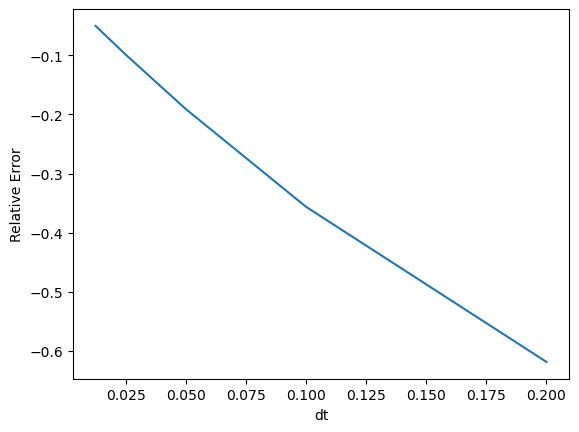

In [3]:
import numpy as np 
import pylab as p

tmin = 0.0
tmax = 4.0
tau = 0.7
N0 = 100.0

NumOfRuns = 5
ReErPerRun = np.zeros(NumOfRuns)
dtPerRun = np.zeros(NumOfRuns)
ntsPerRun = np.zeros(NumOfRuns)

i=0
while i<NumOfRuns:
    ntsPerRun[i]=10*(2**(i+1))
    time=np.linspace(tmin,tmax,round(ntsPerRun[i]),endpoint=False)
    dtPerRun[i]=time[1]-time[0]

    N_an=np.zeros(round(ntsPerRun[i]))
    N_num=np.zeros(round(ntsPerRun[i]))
    N_num[0],N_an[0]=N0,N0
    j=1
    
    while j<ntsPerRun[i]:
        N_num[j] = N_num[j-1] + (-dtPerRun[i]/tau) * N_num[j-1]
        N_an[j] = N0*np.exp(-time[j]/tau)
        j+=1
    ReErPerRun[i]=(N_num[j-1]-N_an[j-1])/(N_an[j-1])
    '''
    p.plot(time, N_num, '-')
    p.plot(time, N_an, '-')
    p.show()
    '''
    i+=1
    
p.plot(dtPerRun, ReErPerRun, '-')
p.xlabel("dt")
p.ylabel("Relative Error")
p.show()


If all went well above, you should have found that the error is linearly proportional to `dt`. This is because of two factors:
1. We have neglected terms of order $\Delta t^2$ and up (because we have more than a single term the error isn't precisely linear).
2. Each step accumulates this error, and we have to add all of them up. We have `nts` steps, and `nts` $\propto$ `1/dt`.

The product of these two leads to an error at the endpoint that is proportional to `dt`.



## An aside -- Euler's method in general


Euler’s method can be applied to any system of first order ordinary differential equations (ODE’s). Let $u(t)$ denote a __vector__ of unknowns, and $F(u, t)$ denote a vector of right–hand sides. Then a system of ODE’s can be written as:

$\quad \frac{d{\bf u}(t)}{dt} = {\bf F}({\bf u},t)$

The dependent variables are the components of ${\bf u}$, and the independent variable is $t$.

For example, let's take the system for the variables $x(t), y(t), z(t)$:

$$
\begin{aligned}
dx/dt &= x y - z + t \\
dy/dt &= 2 z + x \\
dz/dt &= t^2 - y z
\end{aligned}
$$

This can be written in the above notation using

$$
{\bf u}(t) = 
\left(\begin{array}{c} 
x(t) \\
y(t) \\
z(t)
\end{array}
\right)
$$
and
$$
{\bf F}({\bf u},t) = 
\left(\begin{array}{c} 
x y - z + t \\
2 z + x \\
t^2 - y z
\end{array}
\right)
$$

Note that in this case, the RHS of the differential equation depends explicitly on $t$, which wasn't the case for nuclear decay.

Discretizing these equations, and applying the Euler's method, we then find

$$
u^j_{i+1} = u^j_i + F^j(u_i,t) \Delta t
$$

where $j$ is the $j^\mathrm{th}$ component of ${\bf u}$, and $i$ indexes the time variable (just as above).  Expanding this back out into $(x,y,z)$, we find:

$$
\begin{aligned}
x_{i+1} &= x_i + \left( x_i y_i - z_i + t_i\right) \Delta t \\
y_{i+1} &= y_i + \left( 2 z_i + x_i\right) \Delta t \\
z_{i+1} &= z_i + \left(t_i^2 - y_i z_i\right) \Delta t
\end{aligned}
$$

The process of converting the continuous ODE's into discrete equations is called _discretization_.

## Free Fall equations

### Without drag

Consider an object freely falling along the vertical $y$ axis under the influence of gravity. Newton’s second law tells us that the time rate of change of velocity is $dv/dt = -g$, where $g$ is the acceleration due to gravity. The velocity is defined as the time rate of change of position, $v = dy/dt$. Thus, the motion of the object is governed by the ODE’s

$$
\begin{aligned}
\frac{dy}{dt} &= v \\
\frac{dv}{dt} &= -g
\end{aligned}
$$

We can combine these two into a single second order differential equation:
$$
\frac{d^2 y}{dt^2} = -g
$$
but for numerical purposes, the first order form is easier to use.

### With drag

The following image from the lab of Prof. [Lydia Bourouiba](http://lbourouiba.mit.edu) (MIT) was created by leaving a camera running during a cough, so that it shows the $x$ vs. $y$ trajectories of many cough droplets at once

![image](http://lbourouiba.mit.edu/sites/default/files/styles/large/public/coughdroplets_0.jpg?itok=HzamlEQl)

Note that these shapes are not the familiar, symmetric parabolas we are used to seeing for kinematic motion problems. We will model this behavior using a  _Stokes' drag force_ that is proportional to the speed of the droplet, an approximation that is valid only if the airflow isn't too turbulent. 

$$
\begin{aligned}
\frac{dy}{dt} &= v \\
\frac{dv}{dt} &= -g - \beta v
\end{aligned}
$$

The pseudocode for the algorithm looks like:

    set the initial values of y (y[0]) and v (v[0])
    
    for each time point i, use the information from that point to determine the position and 
    velocity at i+1:
    
        determine v[i+1] from v[i] and the derivative of velocity (acceleration)
        determine y[i+1] from y[i] and the derivative of position (velocity, i.e. v[i])

## Homework 4.1

Complete the follow items (which you will then write up and turn in). The first 5 are with no drag, i.e. with $\beta=0$ and you can check your work against the kinematic equations, and then in #6 you'll run some of the same code again with drag.

1) Use Euler’s method to discretize the equations of motion for the position and velocity in the cell above (this is pen and paper math).

2) Write a python code that uses Euler’s method to solve for the motion of an object in free fall.  Note that you should solve them *at the same time* -- you can't generally first solve for $v$ and then for $y$. Choose the initial conditions $y_0 = 12.0m$ and $v_0 = 35.0 m/s$ and set $g = 9.8 m/s^2$.

3) Use your code to determine the height for times $0 \leq t \leq 8 s$, with evenly-spaced values of $t$. Plot a graph of y versus t. (Make sure your graph is properly labeled.)

4) Solve for the height of the object analytically, and (for the given initial conditions) find the exact height at $t = 8 s$.

5) Have your code compute the relative error |approximate-true|/|true| in the height at $t = 8 s$. Do this for at least four different _resolutions_ (aka number of points). Show that the error is approximately cut in half when the resolution is doubled.

6) One of the big advantages of having a computer solve differential equations is that we can solve things that cannot be done easily analytically. To demonstrate this, add a term in the acceleration representing air friction.  Choose a resolution from part 5. that you're happy with. Make a plot of several trajectories with varying values of $\beta$, including $\beta= 0$, and also plot the analytic result for $\beta=0$ (only). (Note: definitely copy your own code from earlier in the problem: the aim is to have all the curves on the same axes.)

### Code

Your code for item 2 of Problem 4.1, should be implemented as a function `freefall` so that it takes

* **Input:** `t, y0, v0, g, beta` (in that order, where `t` is a numpy array of times at which to find $y(t)$ and the other 4 values are floating point numbers)
* **Output:** numpy array `y` (together with `t`, this will make $y(t)$, so those two arrays therefore need to have the same length)
* the function call for item 2 would therefore look like `y = freefall(t, 12.0, 35.0, 9.8, 0)` assuming that the array `t` had been previously defined 
* Check that your code works for a few values of $t$.

### Writeup

b) Discretized equations of motion 

c) A plot of $y(t)$ for the different resolutions you chose, properly labelled.

d)  A plot of the error at $t_{max}$ vs $\Delta t$ (i.e. for different resolutions), properly labelled.

e) Plots of the $y(t)$ and $v(t)$ with drag, properly labelled (item #6 includes item #3. within it; just one plot is fine)

f) Some thoughts as to whether your plots with drag make any sense.

g) Some indication of which resolution you chose for #6, and why it's acceptable

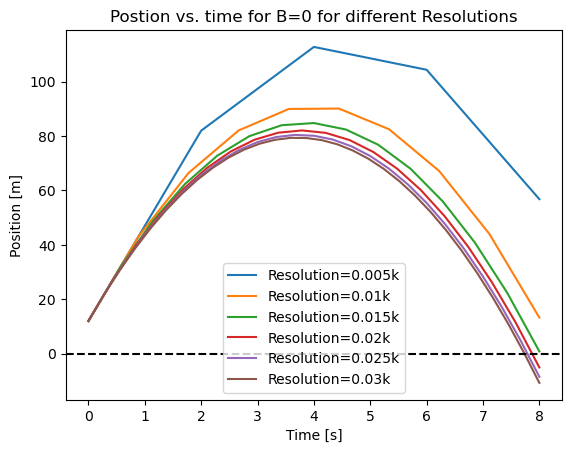

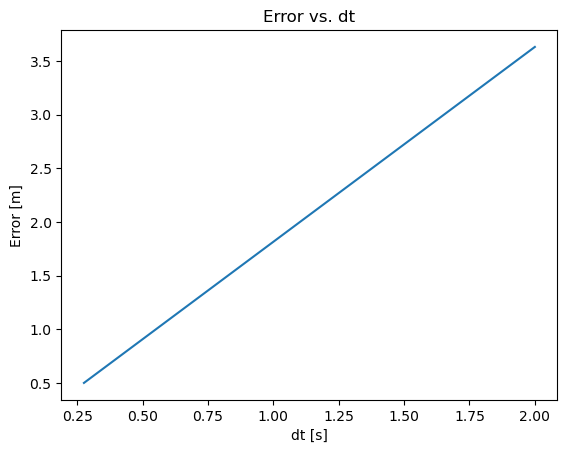

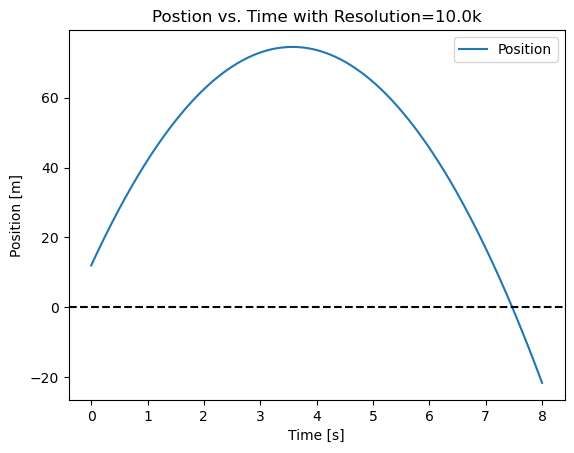

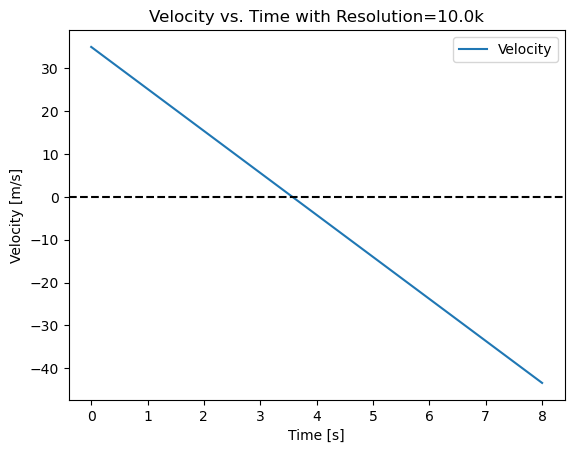

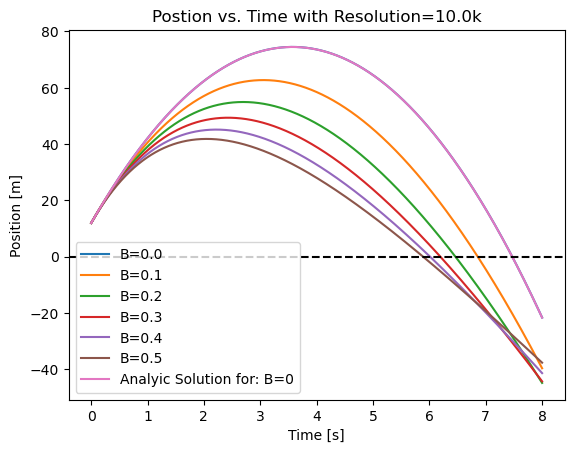

In [4]:
import numpy as np 
import pylab as p

def freefall(t,yi,vyi,ayi,B,res):
    y=np.zeros(res)
    vy=np.zeros(res)
    ay=np.zeros(res)
    y[0],vy[0],ay[0]=yi,vyi,ayi-B*vyi
    dt=t[1]-t[0]

    for i in range(1, len(t) ): 
        y[i]=y[i-1]+vy[i-1]*dt
        vy[i]=vy[i-1]+ay[i-1]*dt
        ay[i]=ayi-vy[i]*B
    return y
def analytic(res,t,yi,vyi,ayi):
    y=np.zeros(res)
    v=np.zeros(res)
    for i in range(0,len(t)):
        y[i]=yi+vyi*t[i]+1/2*ayi*t[i]**2
        v[i]=vyi+ayi*t[i]    
    return y,v


yi=12
vyi=35
ayi=-9.8
B=0
ti=0
tf=8

res1=10000
t1 = np.linspace(ti, tf, res1) 
yan,van=analytic(res1,t1,yi,vyi,ayi)

res=5
topres=30
inc=5
error=np.zeros(round((topres-res)/(inc)+1))
dt=np.zeros(round((topres-res)/(inc)+1))
i=0
while res<=topres:
    t = np.linspace(ti, tf, res) 
    y=freefall(t,yi,vyi,ayi,B,res)
    p.plot(t, y, '-', label="Resolution="+str(res/1000)+"k")
    error[i]=(y[res-1]-yan[res1-1])/yan[res1-1]
    dt[i]=t[1]-t[0]
    i+=1
    res+=inc
    
p.legend()
p.axhline(0.0, color='k', linestyle='--')
p.title("Postion vs. time for B=0 for different Resolutions")
p.xlabel("Time [s]")
p.ylabel("Position [m]")
p.show()

p.plot(dt,abs(error),'-',label="Error")
p.title("Error vs. dt")
p.xlabel("dt [s]")
p.ylabel("Error [m]")
p.show()


p.plot(t1,yan,'-',label="Position")
p.legend()
p.axhline(0.0, color='k', linestyle='--')
p.title("Postion vs. Time with Resolution="+str(res1/1000)+"k")
p.xlabel("Time [s]")
p.ylabel("Position [m]")
p.show()

p.plot(t1,van,'-',label="Velocity")
p.legend()
p.axhline(0.0, color='k', linestyle='--')
p.title("Velocity vs. Time with Resolution="+str(res1/1000)+"k")
p.xlabel("Time [s]")
p.ylabel("Velocity [m/s]")
p.show()



res=10000
t = np.linspace(ti, tf, res) 
while B<=0.5:
    y=freefall(t,yi,vyi,ayi,B,res)
    p.plot(t, y, '-', label="B="+str(round(B*10)/10))
    B+=0.1
p.plot(t,yan,'-', label="Analyic Solution for: B=0")
p.legend()
p.axhline(0.0, color='k', linestyle='--')
p.title("Postion vs. Time with Resolution="+str(res/1000)+"k")
p.xlabel("Time [s]")
p.ylabel("Position [m]")
p.show()





b). for $a=-9.8m/s$, $$y=y_o+v_0t+1/2a_0t^2$$  $$v=v_0+a_0t$$.


c). See "Postion vs. time for B=0 for different Resolutions" graph above.

d). See "Error vs. dt" graph above.

e). See "Postion vs. Time with Resolution=10.0k" and "Velocity vs. Time with Resolution=10.0k" graphs above.

f). The drag plots take a shape that is expected. the peak position decreases as drag increases which makes sense becuase the system will loose engery. The plots also show that the slope of the plots with drag appear to approach a linear rate. This linear relation makes sense as the system approaches terminal velocity. 

g). I choose 10k steps for my "resolution". This is higher than needed to produce a reasonable result. Truthfully when 50+ steps are used for this plot the approximation is fairly strong. I used 10K simply because it added to noticable time to my computation. 


# Post-class

* before you leave class today, push your in-class work to the github.
* before the next class meeting: you should finish the rest of the exercises on your own, since Module 6.2 builds on the work you did today
* it will be helpful (but not required) to also complete much of the HW problem

# Acknowledgements
This workbook is lightly modified from K.E. Daniels's _Introduction to Scientific Computing_ at NCSU